In [12]:
!ls model/resnet/

resnet-fc2k-fc2k-sm.1.log


In [18]:
filename="model/vgg16-fc1k-sm.1.log"
fileout="vgg16-4k-1.png"

# m.txt
# inceptionv3.gap.fc1k.sm.1.txt
# inceptionv3.gap.fc1k.gap.sm.1.txt
# inceptionv3.gap.fc1k.gap.sm.1.stage1.txt
# inceptionv3.gap.fc1k.gap.sm.1.stage12.txt

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
acc=[]
val_acc=[]
loss=[]
val_loss=[]
with open(filename) as fp:  
    line = fp.readline()
    cnt = 1
    while line:
        line = line.rstrip()
        if line.startswith("MODEL NAME:"):
            modelname=line[12:]
            
        if line.startswith("layers to train:"):
            layers_train=line[16:]

        if line.startswith("Number of classes:"):
            no_of_classes=line[18:]
        
        if line.startswith("KERAS model:"):
            model_type=line[12:]
            
        if line.startswith("EPOCHS:"):
            epochs=line[8:]
            
        if line.startswith("Accuracy:"):
            acc.append(float(line[9:]))
            
        if line.startswith("Validation Accuracy:"):
            val_acc.append(float(line[20:]))

        if line.startswith("Loss:"):
            loss.append(float(line[5:]))
            
        if line.startswith("Validation Loss:"):
            val_loss.append(float(line[16:]))
                
            
        line = fp.readline()
        cnt += 1
fp.close
modeltitle=modelname+layers_train
print(modeltitle)
print("Model Type:", model_type)
print("Model Name: ",modelname)
print("Layers Trained: ", layers_train)
print("Number of Classes:", no_of_classes)
print("Trained for ",epochs," epochs")


vgg16-fc1k-sm..h5-18
Model Type: VGG16-width-height
Model Name:  vgg16-fc1k-sm..h5
Layers Trained:  -18
Number of Classes: 2
Trained for  90  epochs


In [21]:
print("Maximum Training Accuracy", round(max(acc),3)," at epoch ",acc.index(max(acc)))
print("Maximum Validation Accuracy", round(max(val_acc),3)," at epoch ",val_acc.index(max(val_acc)))
print("Minimum Loss ", round(max(loss),3)," at epoch ",loss.index(min(loss)))
print("Minimum Validation Loss", round(max(val_loss),3)," at epoch ",val_loss.index(min(val_loss)))

maxacc=max(acc)
xa = acc.index(maxacc)
maxvacc=max(val_acc)
xb = val_acc.index(maxvacc)
minloss=min(loss)
xc=loss.index(minloss)
minvloss=min(val_loss)
xd=val_loss.index(minvloss)


Maximum Training Accuracy 0.99  at epoch  188
Maximum Validation Accuracy 0.982  at epoch  257
Minimum Loss  1.829  at epoch  260
Minimum Validation Loss 1.269  at epoch  232


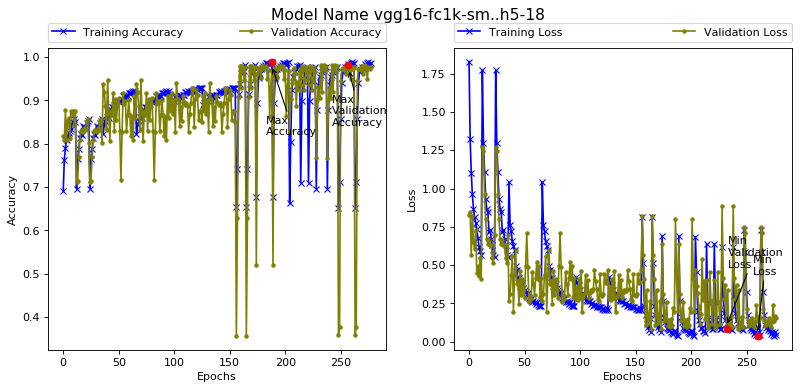

In [22]:
### from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')

x1 = range(len(acc))

plt.subplot(1, 2, 1)
plt.plot(x1, acc, 'x-', color="blue", label = "Training Accuracy")
plt.plot(x1, val_acc, '.-', color="olive", label = "Validation Accuracy")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

plt.plot(xa,maxacc,'o',color="red")
plt.plot(xb,maxvacc,'o',color="red")
plt.annotate('Max\nAccuracy', xy=(xa, maxacc-0.01), xytext=(xa-5, maxacc-0.17),arrowprops=dict(arrowstyle="->"))
plt.annotate('Max\nValidation\nAccuracy', xy=(xb, maxvacc-0.01), xytext=(xb-15, maxvacc-0.14),arrowprops=dict(arrowstyle="->"))

plt.plot()

plt.suptitle('Model Name '+modeltitle, fontsize=14)
#plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel("Epochs")

plt.subplot(1, 2, 2)
plt.plot(x1, loss, 'x-', color="blue", label="Training Loss")
plt.plot(x1, val_loss, '.-', color="olive", label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.annotate('Min\nLoss', xy=(xc, minloss+0.02), xytext=(xc-4, minloss+0.4),arrowprops=dict(arrowstyle="->"))     
plt.annotate('Min\nValidation\nLoss', xy=(xd, minvloss+0.02), xytext=(xd+1, minvloss+0.4),arrowprops=dict(arrowstyle="->"))

plt.plot(xc,minloss,'o',color="red")
plt.plot(xd,minvloss,'o',color="red")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.savefig(fileout)
plt.show()

<Figure size 432x288 with 0 Axes>